# Bike Sharing Demand Prediction – Linear Regression

## 1. Problem Statement
## 2. Understanding the Dataset
## 3. Data Preparation
## 4. Exploratory Data Analysis
## 5. Feature Engineering
## 6. Train-Test Split
## 7. Feature Scaling
## 8. Model Building
## 9. Residual Analysis
## 10. Model Evaluation
## 11. Conclusion

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the csv file using 'read_csv'.

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Linear Regression Bike/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [9]:
df.shape
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
categorical  = ['season','weathersit','weekday','mnth']
category_mappings = {
    'season': {
        1: 'spring',
        2: 'summer',
        3: 'fall',
        4: 'winter'
    },
    'yr': {
        0: '2018',
        1: '2019'
    },
    'mnth': {
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
        5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
        9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    },
    'weekday': {
        0:'Sun',
        1:'Mon',
        2:'Tue',
        3:'Wed',
        4:'Thu',
        5:'Fri',
        6:'Sat'
    },
    'weathersit': {
        1: 'Clear',
        2: 'Mist_Cloudy',
        3: 'Light_Rain_Snow',
        4: 'Heavy_Rain_Snow'
    }
}
for col in categorical:
    df[col] = df[col].map(category_mappings[col])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


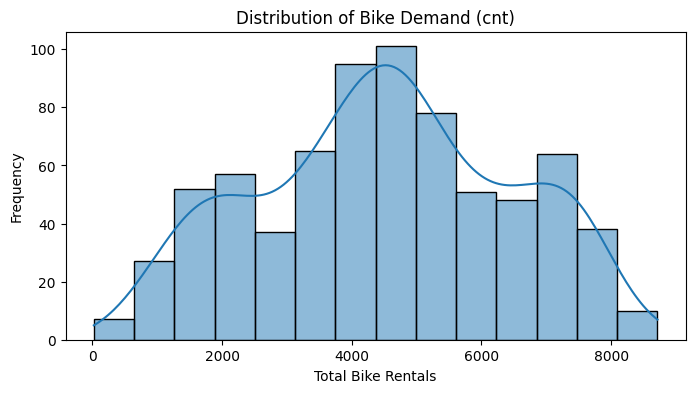

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Bike Demand (cnt)')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()



Most of the days me total bike rentals 3500–5000 ke range me rahe

Very low demand days ka count kam hai

Very high demand days (7000–8500) kam hain, jo peak season ya favorable weather ko indicate karte hain


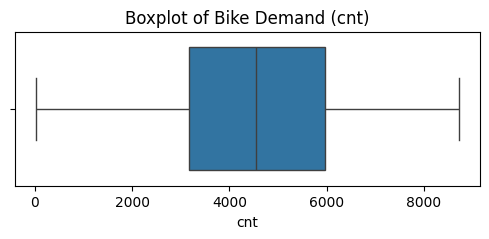

In [12]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['cnt'])
plt.title('Boxplot of Bike Demand (cnt)')
plt.show()


Median bike demand around 4500 rentals per day hai

Middle 50% of days (IQR) me demand approximately 3000–6000 ke beech rahi

Koi extreme or abnormal outliers clearly visible nahi hain



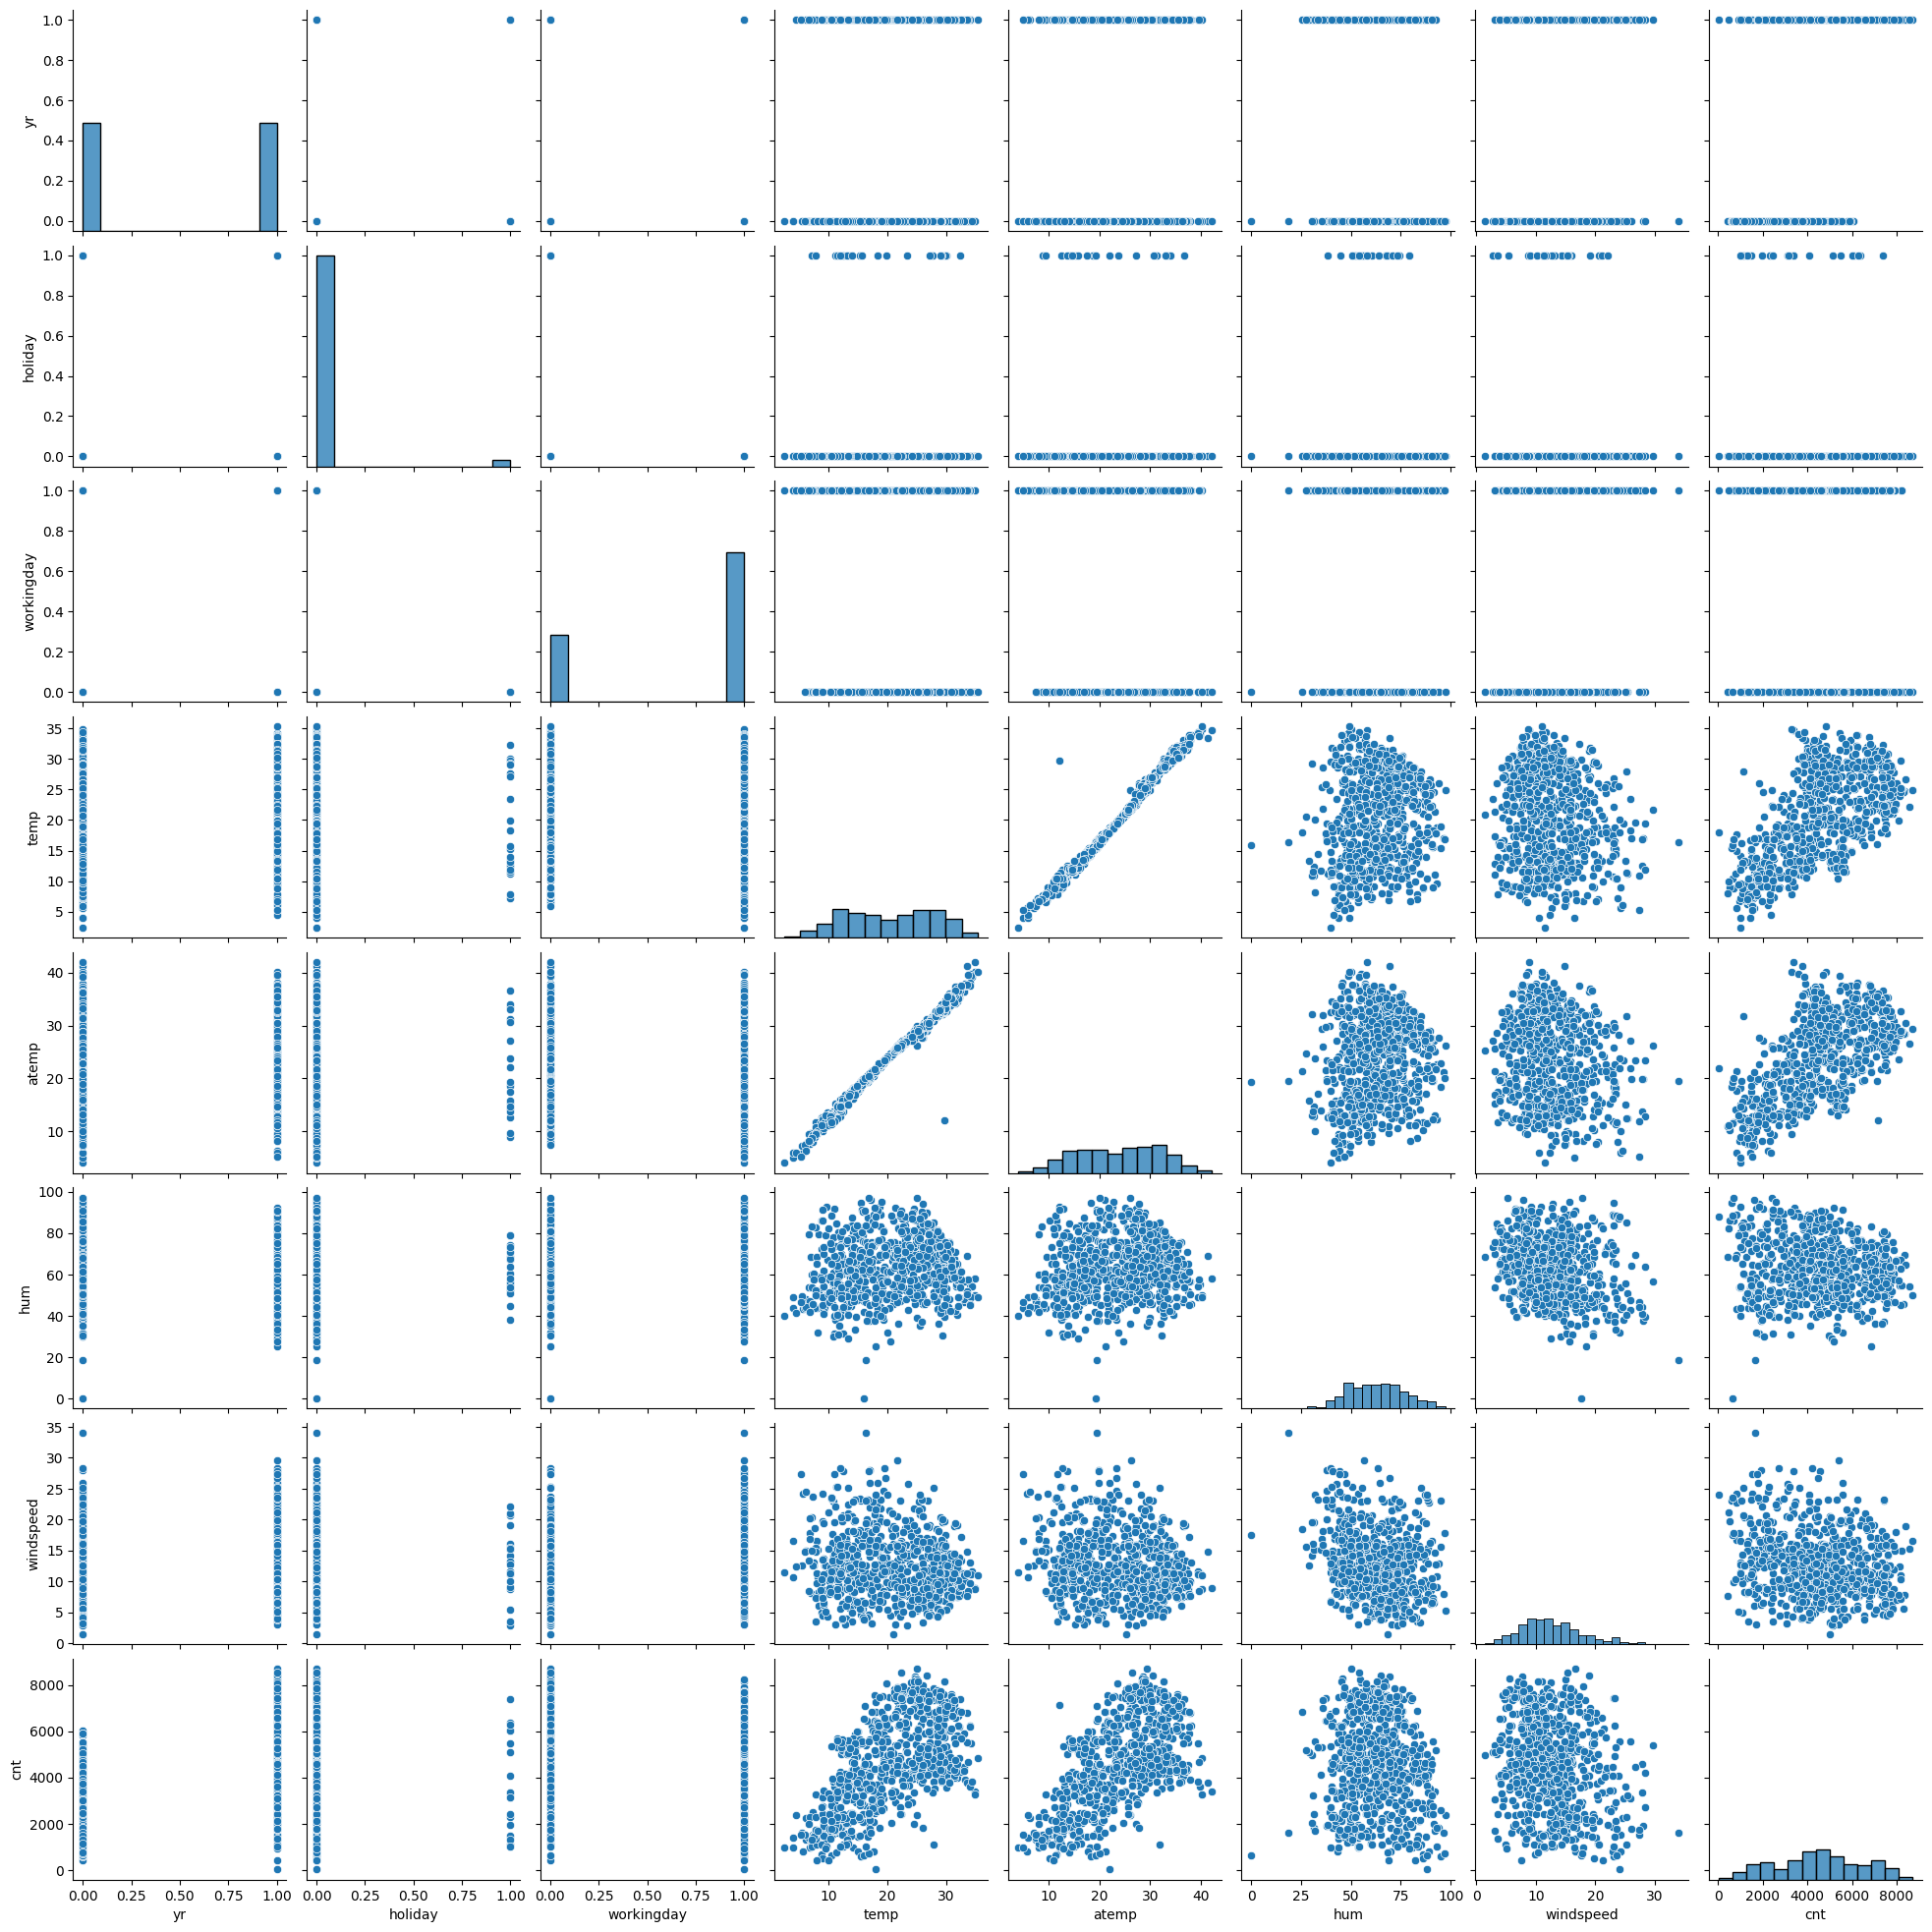

In [13]:
sns.pairplot( df)

Pairplot analysis shows that bike demand (cnt) has a strong positive relationship with temperature (temp and atemp). temp and atemp are highly correlated, indicating multicollinearity. Humidity and windspeed show weak relationships with demand. Demand increases in year 2019 (yr=1) and is slightly lower on holidays.

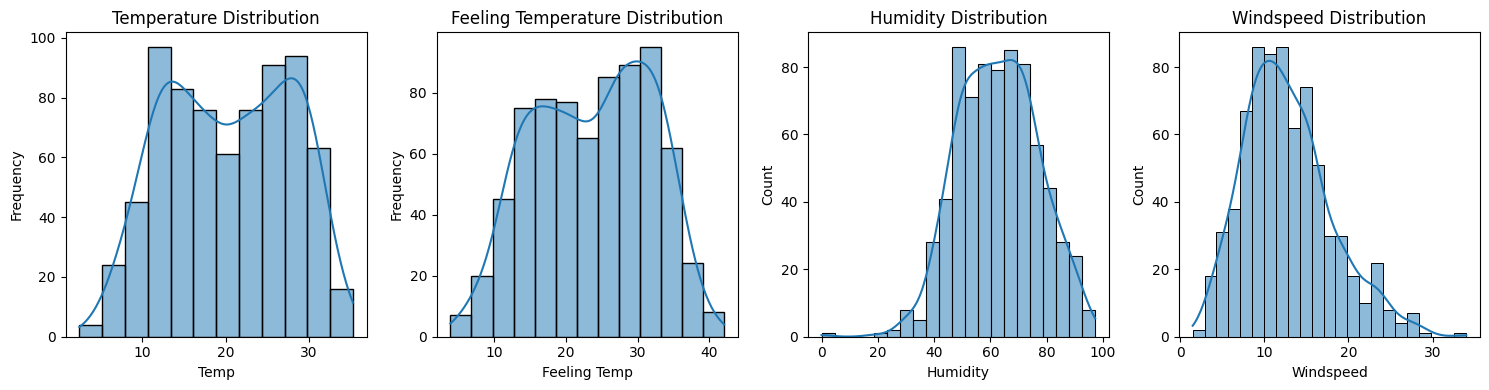

In [18]:


plt.figure(figsize=(15,4))

# Temperature
plt.subplot(1,4,1)
sns.histplot(df['temp'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temp')
plt.ylabel('Frequency')

# Feeling Temperature
plt.subplot(1,4,2)
sns.histplot(df['atemp'], kde=True)
plt.title('Feeling Temperature Distribution')
plt.xlabel('Feeling Temp')
plt.ylabel('Frequency')


# Humidity
plt.subplot(1,4,3)
sns.histplot(df['hum'], kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')

# Windspeed
plt.subplot(1,4,4)
sns.histplot(df['windspeed'], kde=True)
plt.title('Windspeed Distribution')
plt.xlabel('Windspeed')

plt.tight_layout()
plt.show()


Temperature and Feeling Temprature

    Most temperature values are concentrated in the mid range
    Very low and very high temperatures are less frequent
    Distribution is approximately normal

Humidity

    Humidity values are mostly moderate to high
    Extreme low humidity occurs less often
    Distribution is approximately normal

Windspeed

    Low windspeed values occur most frequently
    High windspeed values are rare
    Distribution is right-skewed





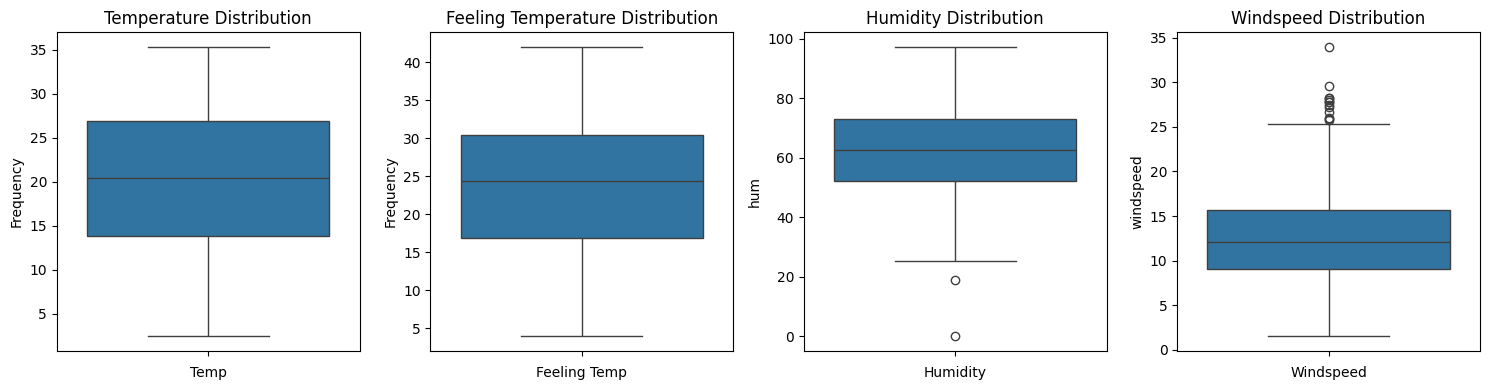

In [20]:


plt.figure(figsize=(15,4))

# Temperature
plt.subplot(1,4,1)
sns.boxplot(df['temp'])
plt.title('Temperature Distribution')
plt.xlabel('Temp')
plt.ylabel('Frequency')

# Feeling Temperature
plt.subplot(1,4,2)
sns.boxplot(df['atemp'])
plt.title('Feeling Temperature Distribution')
plt.xlabel('Feeling Temp')
plt.ylabel('Frequency')


# Humidity
plt.subplot(1,4,3)
sns.boxplot(df['hum'])
plt.title('Humidity Distribution')
plt.xlabel('Humidity')

# Windspeed
plt.subplot(1,4,4)
sns.boxplot(df['windspeed'])
plt.title('Windspeed Distribution')
plt.xlabel('Windspeed')

plt.tight_layout()
plt.show()


Windspeed shows outliers, indicating few high-wind days; these values can be usefull because may be it affects bike demand. So i will keep this.

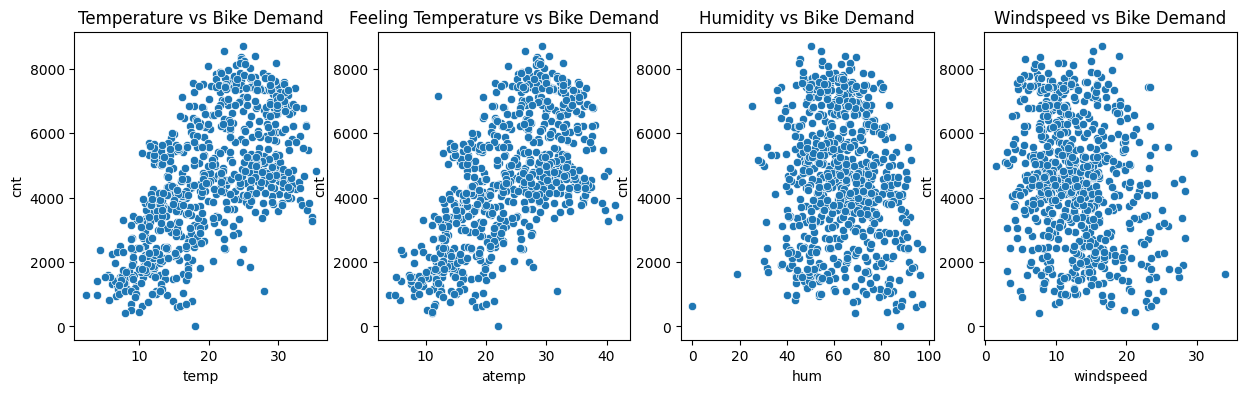

In [17]:
plt.figure(figsize=(15,4))

# Temperature
plt.subplot(1,4,1)
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Temperature vs Bike Demand')

# Feeling Temprature
plt.subplot(1,4,2)
sns.scatterplot(x='atemp', y='cnt', data=df)
plt.title('Feeling Temperature vs Bike Demand')

# Humidity
plt.subplot(1,4,3)
sns.scatterplot(x='hum', y='cnt', data=df)
plt.title('Humidity vs Bike Demand')

# Windspeed
plt.subplot(1,4,4)
sns.scatterplot(x='windspeed', y='cnt', data=df)
plt.title('Windspeed vs Bike Demand')

plt.show()


Bikes rentals high on days with nice temperature,low wind speed and less humid, while fewer bikes rentals when it is hot, humid, or windy.

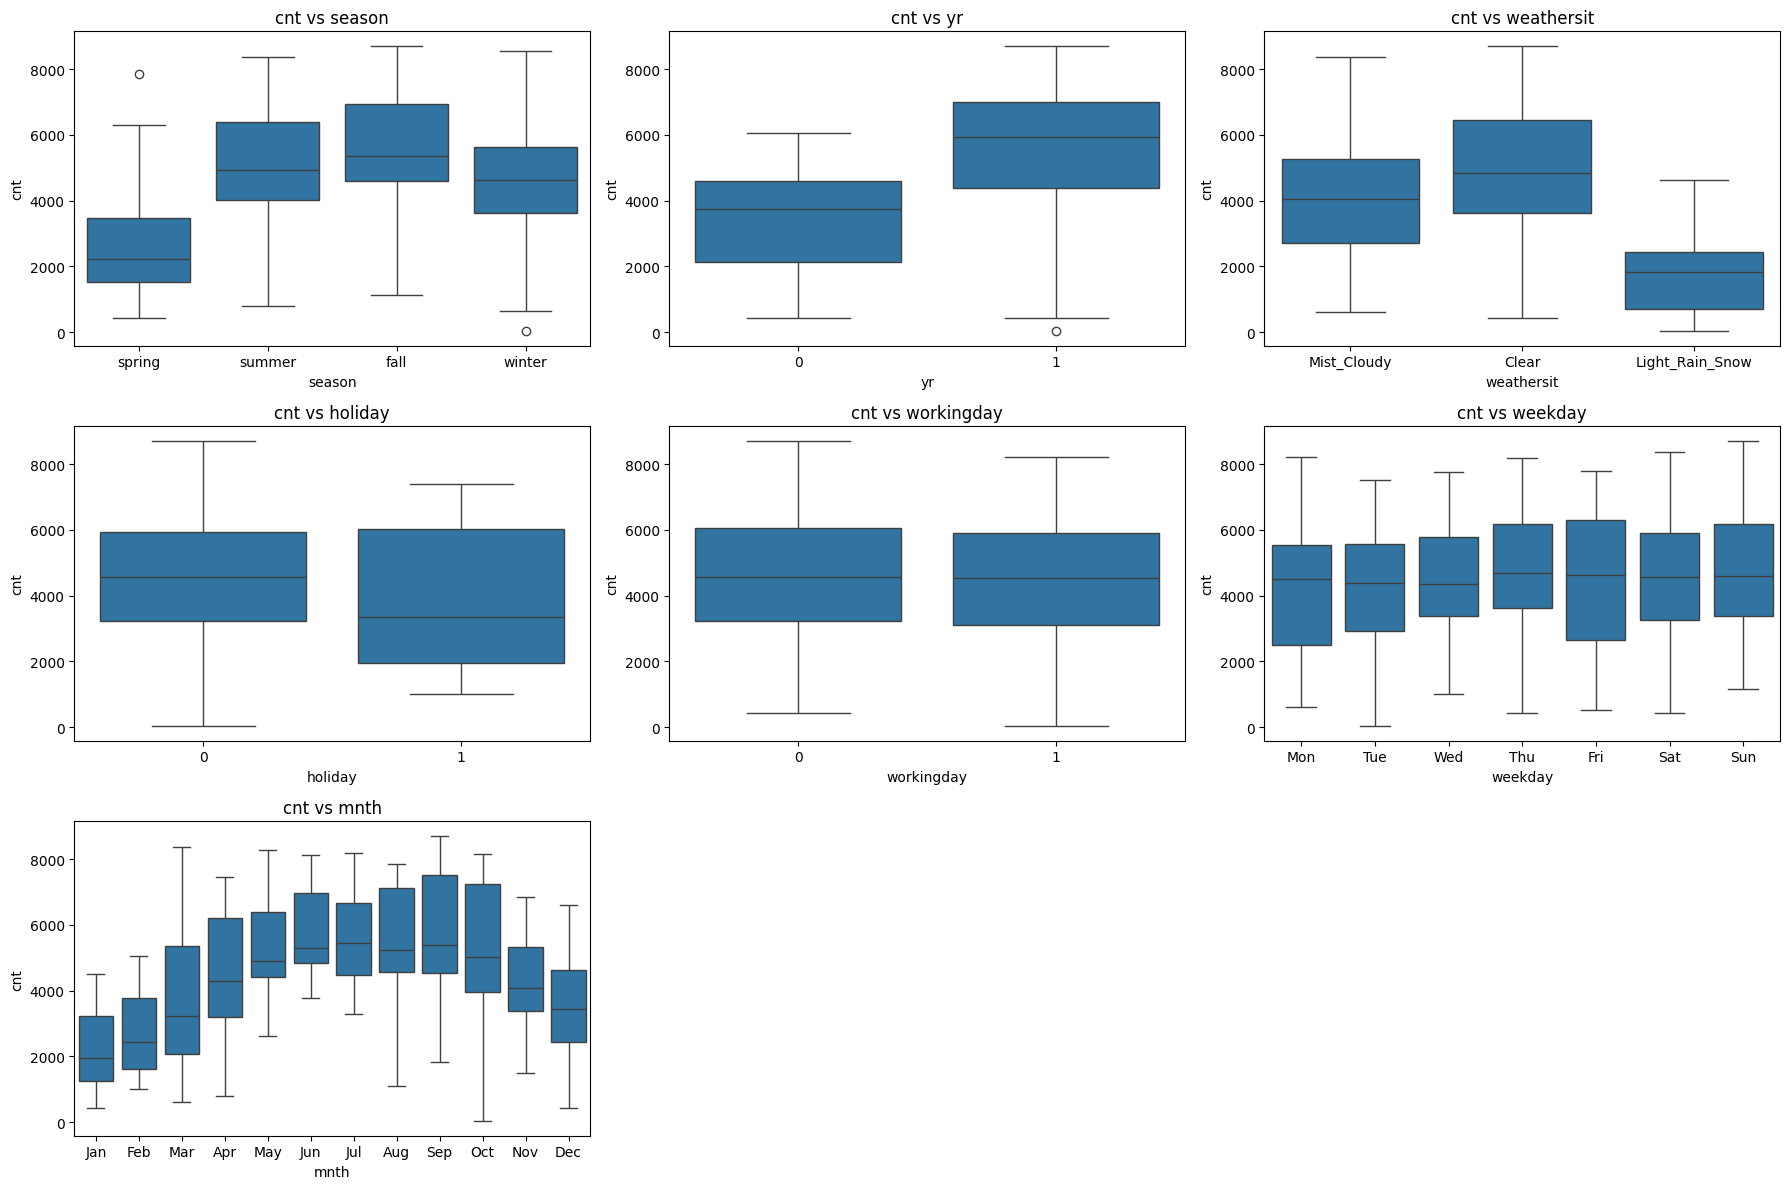

In [23]:
cat_cols = ['season', 'yr', 'weathersit', 'holiday',
            'workingday', 'weekday', 'mnth']

plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f'cnt vs {col}')

plt.tight_layout()
plt.show()


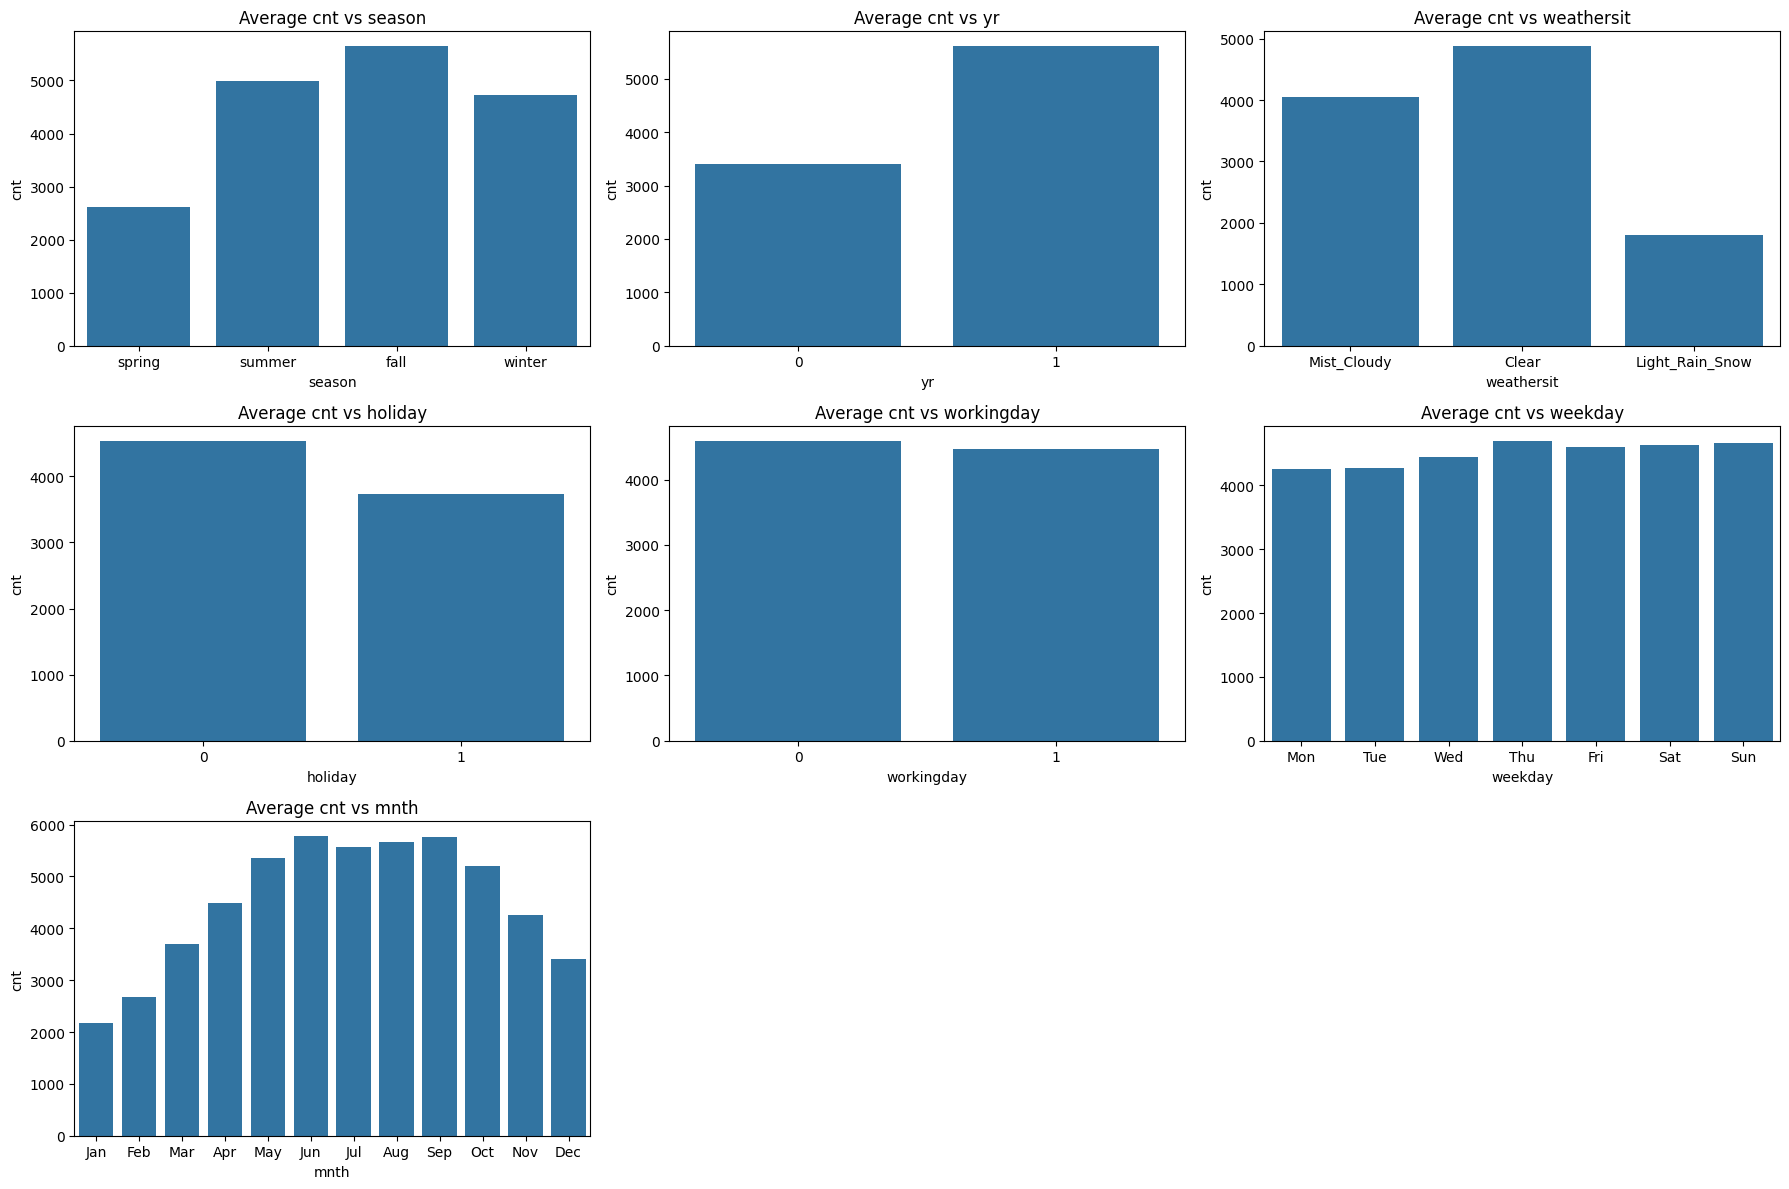

In [25]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=col, y='cnt', data=df, errorbar=None)
    plt.title(f'Average cnt vs {col}')

plt.tight_layout()
plt.show()


    cnt vs season
    •	Spring has the lowest demand
    •	Fall shows the highest bike rentals
    •	Summer & Winter have moderate to high demand
    •	Variability is higher in summer and fall

    Bike demand is strongly seasonal, peaking in fall and lowest in spring.

    cnt vs yr (2018 vs 2019)
    •	Year 2019 (yr=1) shows higher median demand than 2018

    Bike demand increased significantly in the second year, indicating growth trend.

    cnt vs weathersit
    •	Clear weather has the highest bike demand
    •	Mist/Cloudy has moderate demand
    •	Light Rain/Snow shows very low demand

    Weather condition strongly affects bike demand, with sharp drop during rain/snow.

    cnt vs holiday
    •	Non-holidays (0) have higher median demand
    •	Holidays (1) show reduced rentals

    Bike usage is lower on holidays compared to regular days.

    cnt vs workingday
    •	Working and non-working days show similar median demand


    Working day status has limited impact on overall bike demand.

    cnt vs weekday
    •	Demand is consistent across weekdays
    •	Slight increase on Thursday to Sunday
    •	No strong weekday effect

    Bike demand does not change significantly by day of the week.

    cnt vs mnth
    •	Demand increases from Jan to Sep
    •	Peak demand during Aug–Sep
    •	Declines after October


    Bike demand follows a clear monthly pattern with peak in late summer.

    **Conclusion**
    Season, year, weather, and month have strong impact in bike demand, while weekday and workingday have weaker impact.


Strong predictors

season
yr
weathersit
mnth
temp
atemp

Weak predictors
weekday
workingday
holiday

In [32]:
df_original=df.copy()

In [33]:
df['day_status'] = df.apply(
    lambda x: 1 if (x['holiday'] == 1 or x['workingday'] == 0) else 0,
    axis=1
)

df.drop(['holiday', 'workingday'], axis=1, inplace=True)


Holiday and workingday are merged into a single day_status feature to represent working vs non-working days.

In [34]:
df.head()

,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,cnt,day_status
0,spring,0,Jan,Mon,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,Jan,Tue,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,0,Jan,Wed,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,0,Jan,Thu,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,0,Jan,Fri,Clear,9.305237,11.46350,43.6957,12.522300,1600,0


In [35]:
cat_cols = ['season', 'weathersit', 'mnth', 'weekday']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    Dummy variables convert categorical features into numerical format
    without imposing false order, allowing models to correctly learn category-wise impact.

In [41]:
df.head()
df_original.shape
df.shape

(730, 29)

In [42]:
df.head()

,yr,temp,atemp,hum,windspeed,cnt,day_status,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,14.110847,18.18125,80.5833,10.749882,985,0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0,14.902598,17.68695,69.6087,16.652113,801,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,8.050924,9.47025,43.7273,16.636703,1349,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,8.200000,10.60610,59.0435,10.739832,1562,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,9.305237,11.46350,43.6957,12.522300,1600,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


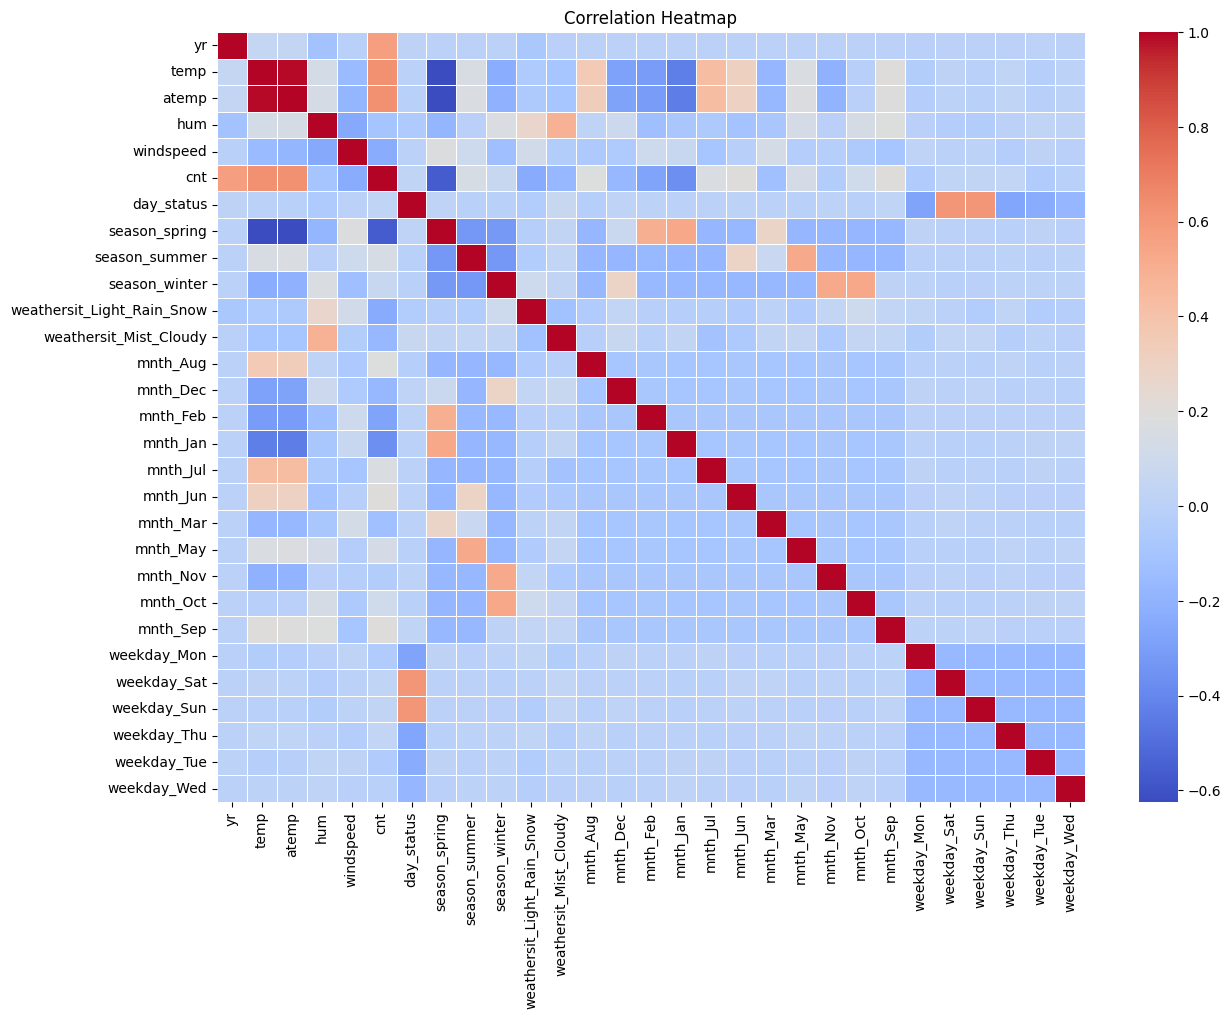

In [43]:
plt.figure(figsize=(14, 10))

corr = df.corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=False,
    fmt=".2f",
    linewidths=0.5
)

plt.title('Correlation Heatmap')
plt.show()


In [44]:
X = df.drop('cnt', axis=1)
y = df['cnt']


In [60]:
#### Train - Test Split (Data is splited into training and testing sets to evaluate model generalization.)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100)




In [61]:
X.describe()

,yr,temp,atemp,hum,windspeed,day_status
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,23.726322,62.765175,12.763620,0.309589
std,0.500343,7.506729,8.150308,14.237589,5.195841,0.462641
min,0.000000,2.424346,3.953480,0.000000,1.500244,0.000000
25%,0.000000,13.811885,16.889713,52.000000,9.041650,0.000000
50%,0.500000,20.465826,24.368225,62.625000,12.125325,0.000000
75%,1.000000,26.880615,30.445775,72.989575,15.625589,1.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,1.000000


In [65]:
X_train = X_train.astype(int)
X_test  = X_test.astype(int)


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   yr                          510 non-null    int64
 1   temp                        510 non-null    int64
 2   atemp                       510 non-null    int64
 3   hum                         510 non-null    int64
 4   windspeed                   510 non-null    int64
 5   day_status                  510 non-null    int64
 6   season_spring               510 non-null    int64
 7   season_summer               510 non-null    int64
 8   season_winter               510 non-null    int64
 9   weathersit_Light_Rain_Snow  510 non-null    int64
 10  weathersit_Mist_Cloudy      510 non-null    int64
 11  mnth_Aug                    510 non-null    int64
 12  mnth_Dec                    510 non-null    int64
 13  mnth_Feb                    510 non-null    int64
 14  mnth_Jan      

In [67]:
### Stats Modal

import statsmodels.api as sm

# Add constant
X_train_sm = sm.add_constant(X_train)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     96.75
Date:                Sat, 27 Dec 2025   Prob (F-statistic):          6.22e-178
Time:                        11:32:27   Log-Likelihood:                -4104.8
No. Observations:                 510   AIC:                             8268.
Df Residuals:                     481   BIC:                             8390.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [
    variance_inflation_factor(X_train.values, i)
    for i in range(X_train.shape[1])
]

vif.sort_values(by='VIF', ascending=False)


,Feature,VIF
1,temp,461.992411
2,atemp,435.747335
3,hum,38.042722
5,day_status,15.049399
6,season_spring,12.121177
8,season_winter,11.911593
24,weekday_Sun,8.907524
23,weekday_Sat,8.399941
7,season_summer,7.412577
4,windspeed,7.203596


from matplotlib import pyplot as plt
_df_0['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

In [70]:
# Drop atemp due to multicollinearity with temp
X_train.drop('atemp', axis=1, inplace=True)
X_test.drop('atemp', axis=1, inplace=True)


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [
    variance_inflation_factor(X_train.values, i)
    for i in range(X_train.shape[1])
]

vif.sort_values(by='VIF', ascending=False)


,Feature,VIF
1,temp,42.165666
2,hum,37.752723
4,day_status,15.001549
5,season_spring,12.033773
7,season_winter,11.857987
23,weekday_Sun,8.870960
22,weekday_Sat,8.387695
6,season_summer,7.275896
3,windspeed,7.007567
19,mnth_Oct,6.502498


In [72]:
### Stats Modal

import statsmodels.api as sm

# Add constant
X_train_sm = sm.add_constant(X_train)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sat, 27 Dec 2025   Prob (F-statistic):          7.89e-179
Time:                        11:46:30   Log-Likelihood:                -4105.1
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     482   BIC:                             8385.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [73]:
#### droping because of high p value >0.05
cols_to_drop = [
    'mnth_Jun','mnth_Mar','mnth_Oct','mnth_Jul','mnth_May',
    'mnth_Feb','mnth_Nov','mnth_Dec','mnth_Aug',
    'weekday_Thu','weekday_Wed'
]

X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [
    variance_inflation_factor(X_train.values, i)
    for i in range(X_train.shape[1])
]

vif.sort_values(by='VIF', ascending=False)


,Feature,VIF
2,hum,30.036313
1,temp,17.753940
4,day_status,14.077227
14,weekday_Sun,7.551188
13,weekday_Sat,7.177411
3,windspeed,6.393033
5,season_spring,4.221682
7,season_winter,3.168687
6,season_summer,2.455461
9,weathersit_Mist_Cloudy,2.314820


In [75]:
### Stats Modal

import statsmodels.api as sm

# Add constant
X_train_sm = sm.add_constant(X_train)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sat, 27 Dec 2025   Prob (F-statistic):          9.16e-186
Time:                        11:53:42   Log-Likelihood:                -4116.6
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     493   BIC:                             8339.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

    
    High VIF in core weather and calendar features is due to structural multicollinearity and was retained.


In [77]:
####Feature Scaling (Feature scaling ensures all variables contribute equally to the model.)
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)



In [78]:
X_train_scaled

,yr,temp,hum,windspeed,day_status,season_spring,season_summer,season_winter,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy,mnth_Jan,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Tue
653,0.984435,-0.081107,-0.539873,-0.062269,-0.636364,-0.566783,-0.569803,1.736591,-0.174078,-0.722764,-0.311086,-0.295669,-0.428129,-0.38555,-0.398862,-0.424918
576,0.984435,1.266279,0.521013,-0.251300,-0.636364,-0.566783,-0.569803,-0.575841,-0.174078,-0.722764,-0.311086,-0.295669,-0.428129,-0.38555,-0.398862,-0.424918
426,0.984435,-0.485323,-0.044793,-0.440331,1.571429,1.764342,-0.569803,-0.575841,-0.174078,1.383577,-0.311086,-0.295669,-0.428129,-0.38555,2.507133,-0.424918
728,0.984435,-1.293755,-1.034954,2.017070,-0.636364,1.764342,-0.569803,-0.575841,-0.174078,-0.722764,-0.311086,-0.295669,2.335743,-0.38555,-0.398862,-0.424918
482,0.984435,-0.620062,-1.034954,-0.818392,1.571429,-0.566783,1.754993,-0.575841,-0.174078,1.383577,-0.311086,-0.295669,-0.428129,-0.38555,2.507133,-0.424918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.984435,1.266279,-0.327696,0.126762,-0.636364,-0.566783,1.754993,-0.575841,-0.174078,1.383577,-0.311086,-0.295669,-0.428129,-0.38555,-0.398862,2.353394
578,0.984435,1.401018,0.167384,-0.818392,-0.636364,-0.566783,-0.569803,-0.575841,-0.174078,-0.722764,-0.311086,-0.295669,-0.428129,-0.38555,-0.398862,-0.424918
53,-1.015811,-1.428494,-1.459309,-1.196454,-0.636364,1.764342,-0.569803,-0.575841,-0.174078,-0.722764,-0.311086,-0.295669,-0.428129,-0.38555,-0.398862,-0.424918
350,-1.015811,-1.293755,-0.469148,0.693854,-0.636364,-0.566783,-0.569803,1.736591,-0.174078,1.383577,-0.311086,-0.295669,2.335743,-0.38555,-0.398862,-0.424918


In [79]:
#### Train Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [86]:
### Prediction


y_train_pred = lr.predict(X_train_scaled)
y_test_pred  = lr.predict(X_test_scaled)


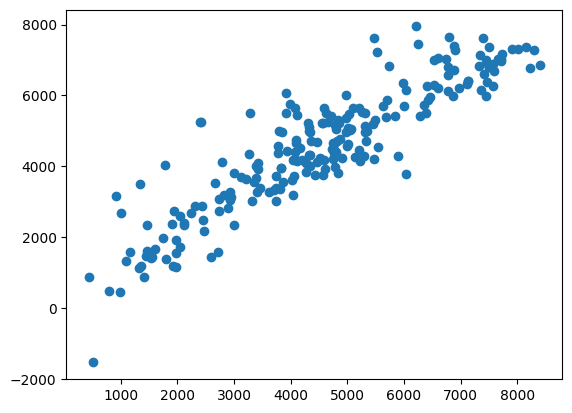

In [87]:
plt.scatter(y_test, y_test_pred)

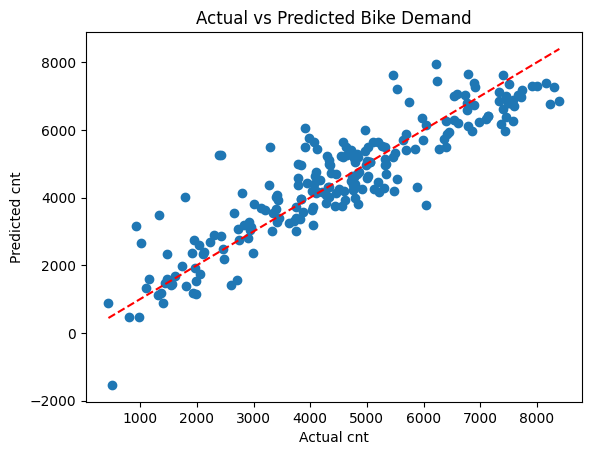

In [88]:
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual cnt")
plt.ylabel("Predicted cnt")
plt.title("Actual vs Predicted Bike Demand")
plt.show()

In [89]:
###Model Evaluation (VERY IMPORTANT)R-Square Score
from sklearn.metrics import r2_score

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2 :", r2_score(y_test, y_test_pred))

Train R2: 0.8421124369231853
Test R2 : 0.8104275622788459


In [90]:
####RMSE Root mean squeared error
from sklearn.metrics import mean_squared_error
import numpy as np

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train RMSE: 774.9307476647035
Test RMSE : 824.7739885466145


# Answer of Assignment-based Subjective Questions--
 **Q1. From your analysis of the categorical variables, what could you infer about their effect on the dependent variable? (3 marks)**

**Ans 1--**

    From the analysis of categorical variables using both EDA and the final regression model, the following inferences were made:
    •	Seasonality has a strong impact on bike demand.
    Exploratory analysis shows that bike demand is higher during summer and winter compared to spring. This observation is supported by the final model, where season_summer shows an increase of approximately +553 bikes and season_winter shows an increase of approximately +890 bikes relative to the baseline season.
    •	Weather conditions play a critical role in determining demand.
    EDA indicates a sharp drop in bike demand during rainy or snowy weather. The regression model strongly confirms this, with the Light Rain/Snow category having a large negative coefficient of approximately −2160 bikes, indicating a substantial reduction in demand during adverse weather conditions.
    •	Month-wise effects reveal clear seasonality patterns.
    Month-level analysis shows that September has significantly higher demand, while January exhibits lower demand, highlighting seasonal variation across months. These month-specific effects remain relevant even after controlling for other variables in the regression model.
    •	Day-related categories also influence bike demand.
    Both EDA and model results show that bike demand is higher on weekends, particularly Saturday and Sunday. The regression coefficients indicate an increase of approximately +798 bikes on Saturdays and +833 bikes on Sundays compared to baseline weekdays. In contrast, holiday or non-working day conditions reduce demand, reflecting lower commuting activity.
    Overall, categorical variables related to season, weather, month, and day type significantly influence shared bike demand.






**Q2. Why is it important to use drop_first=True during dummy variable creation? (2 marks)**

**Ans 2--**

    Using drop_first=True is important because:
    •	It helps avoid the dummy variable trap, where dummy variables become perfectly correlated.
    •	It prevents multicollinearity, which can distort coefficient estimates in linear regression.
    By dropping one category, that category becomes the baseline (reference), and all other dummy coefficients are interpreted relative to it.


**Q3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? (1 mark)**

**Ans 3--**

    •	Temperature (temp) shows the highest positive correlation with the target variable (cnt).
    This indicates that as temperature increases, bike demand increases significantly.


**Q4. How did you validate the assumptions of Linear Regression after building the model on the training set? (3 marks)**

**Ans 4--**

    The assumptions of Linear Regression were validated using the following approaches:

    •	Linearity was assessed using the Actual vs Predicted bike demand scatter plot, which showed a strong diagonal pattern, indicating a linear relationship between predictions and actual values.
    •	Model adequacy and stability were evaluated using performance metrics. The model achieved a Train R² = 0.84 and Test R² = 0.81, showing good generalization with a small performance gap.
    •	Error magnitude was assessed using RMSE, which was ≈ 775 bikes on training data and ≈ 825 bikes on test data, indicating acceptable prediction error relative to the demand range.
    Based on these checks, the linear regression assumptions were considered reasonably satisfied for this dataset.


 **Q5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes? (2 marks)**

**Ans 5 --**

    Based on the final regression coefficients and statistical significance, the top three contributing features are:

    1.	Year (yr)
          
          Coefficient ≈ +2009 bikes
          Indicates strong year-on-year growth in bike demand.

    2.	Temperature (temp)

          Coefficient ≈ +129 bikes per unit increase
          Higher temperatures significantly increase bike usage.

    3.	Weather situation (Light Rain/Snow)

          Coefficient ≈ −2160 bikes
          Adverse weather causes a sharp reduction in demand.


    These variables have the strongest impact (positive or negative) on bike demand in the final model.


 **Conclusion**

  The final linear regression model effectively captures the impact of temporal, weather, and seasonal factors on bike demand with strong predictive performance and stable generalization.
